In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FeCNCA = [file for file in os.listdir() if '.txt' in file and 'CA_Fe(CN)' in file]
dfCN = [pd.read_csv(file, delimiter='\t')for file in FeCNCA]
dfFeCNCA = [df[4:].reset_index() for df in dfCN]
FeAqua = [file for file in os.listdir() if 'txt' in file and 'CA_Fe2+' in file]
dfAqua = [pd.read_csv(file, delimiter='\t')for file in FeAqua]
dfFeAqua = [df[4:].reset_index() for df in dfAqua]
FePhen = [file for file in os.listdir() if '.txt' in file and 'CA_Fe(phen)' in file]
dfPhen = [pd.read_csv(file, delimiter='\t')for file in FePhen]
dfFePhen = [df[4:].reset_index() for df in dfPhen]

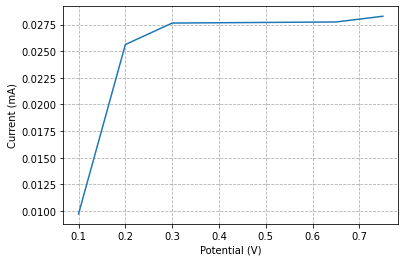

In [3]:
pot = [0.100,0.200,0.300,0.650,0.750]
cur = []
for df in dfFeCNCA:
    df['time/s'] = np.around(df['time/s'],3)
    cur.append(float(df['<I>/mA'][df['time/s']==4.0]))
plt.clf()
plt.figure(num=1, figsize=[10,8])
plt.grid(linestyle = '--')
plt.xlabel('Potential (V)')
plt.ylabel('Current (mA)')
plt.plot(pot, cur)
plt.savefig('SCV_4s.png',bbox_inches='tight',format='png')

In [4]:
slopes = []

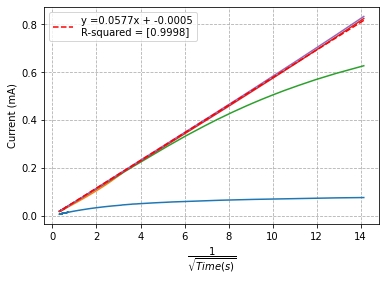

In [5]:
plt.clf()
plt.figure(num=1, figsize=[10,8])
plt.grid(linestyle = '--')
plt.xlabel(r'$\dfrac{1}{\sqrt{Time (s)}}$')
plt.ylabel('Current (mA)')
for df in dfFeCNCA:
    df['t^-1/2'] = np.reciprocal(np.sqrt(df['time/s']))
    plt.plot(df['t^-1/2'],df['<I>/mA'])
linear = pd.DataFrame(columns = ['t^-1/2', '<I>/mA'])
linear['t^-1/2'] = dfFeCNCA[-1]['t^-1/2']#[(dfFeCNCA[-1]['t^-1/2']<20)]
linear['<I>/mA'] = dfFeCNCA[-1]['<I>/mA']#[(dfFeCNCA[-1]['t^-1/2']<20)]
A = np.vstack([linear['t^-1/2'], np.ones(len(linear))]).T
bestfit = np.linalg.lstsq(A,linear['<I>/mA'],rcond = None)
m,b = np.around(bestfit[0],4)
resid = np.around(bestfit[1],4)
R2 = np.around(1-resid/(len(linear)*np.var(linear['<I>/mA'])),4)
plt.plot(dfFeCNCA[-1]['t^-1/2'],m*dfFeCNCA[-1]['t^-1/2']+b,'r',linestyle='--', label = 'y ='+str(m)+'x + '+str(b)+ '\n'
         'R-squared = ' +str(R2))
plt.legend()
plt.savefig('CA_FeCN.png',bbox_inches='tight',format='png')
slopes.append(m)

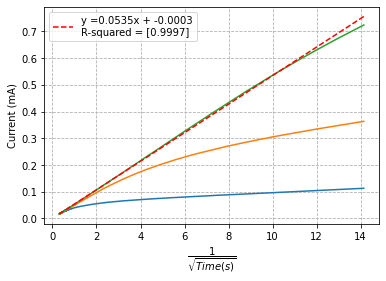

In [6]:
plt.clf()
plt.figure(num=1, figsize=[10,8])
plt.grid(linestyle = '--')
plt.xlabel(r'$\dfrac{1}{\sqrt{Time (s)}}$')
plt.ylabel('Current (mA)')
for df in dfFeAqua:
    df['t^-1/2'] = np.reciprocal(np.sqrt(df['time/s']))
    plt.plot(df['t^-1/2'],df['<I>/mA'])
linear = pd.DataFrame(columns = ['t^-1/2', '<I>/mA'])
linear['t^-1/2'] = dfFeAqua[-1]['t^-1/2']#[(dfFeCNCA[-1]['t^-1/2']>17.5)]
linear['<I>/mA'] = dfFeAqua[-1]['<I>/mA']#[(dfFeCNCA[-1]['t^-1/2']>17.5)]
A = np.vstack([linear['t^-1/2'], np.ones(len(linear))]).T
bestfit = np.linalg.lstsq(A,linear['<I>/mA'],rcond = None)
m,b = np.around(bestfit[0],4)
resid = np.around(bestfit[1],4)
R2 = np.around(1-resid/(len(linear)*np.var(linear['<I>/mA'])),4)
plt.plot(dfFeAqua[-1]['t^-1/2'],m*dfFeAqua[-1]['t^-1/2']+b,'r',linestyle='--', label = 'y ='+str(m)+'x + '+str(b)+ '\n'
         'R-squared = ' +str(R2))
plt.legend()
plt.savefig('CA_FeH2O.png',bbox_inches='tight',format='png')
slopes.append(m)

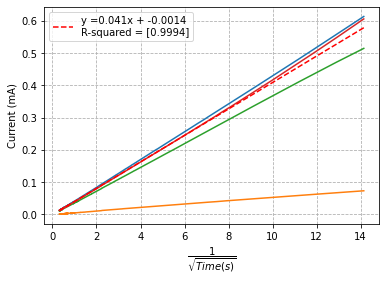

In [7]:
plt.clf()
plt.figure(num=1, figsize=[10,8])
plt.grid(linestyle = '--')
plt.xlabel(r'$\dfrac{1}{\sqrt{Time (s)}}$')
plt.ylabel('Current (mA)')
for df in dfFePhen:
    df['t^-1/2'] = np.reciprocal(np.sqrt(df['time/s']))
    plt.plot(df['t^-1/2'],df['<I>/mA'])
linear = pd.DataFrame(columns = ['t^-1/2', '<I>/mA'])
linear['t^-1/2'] = dfFePhen[-1]['t^-1/2']#[(dfFeCNCA[-1]['t^-1/2']>17.5)]
linear['<I>/mA'] = dfFePhen[-1]['<I>/mA']#[(dfFeCNCA[-1]['t^-1/2']>17.5)]
A = np.vstack([linear['t^-1/2'], np.ones(len(linear))]).T
bestfit = np.linalg.lstsq(A,linear['<I>/mA'],rcond = None)
m,b = np.around(bestfit[0],4)
resid = np.around(bestfit[1],4)
R2 = np.around(1-resid/(len(linear)*np.var(linear['<I>/mA'])),4)
plt.plot(dfFePhen[-1]['t^-1/2'],m*dfFePhen[-1]['t^-1/2']+b,'r',linestyle='--', label = 'y ='+str(m)+'x + '+str(b)+ '\n'
         'R-squared = ' +str(R2))
plt.legend()
plt.savefig('CA_Fephen.png',bbox_inches='tight',format='png')
slopes.append(m)

In [8]:
Diffusion = []
n = 1 
F = 96485 #C/mol
A = np.pi*np.power(0.25,2)#cm^2
C = 5*np.power(10.0,-6) # mol/cm^3
const = np.power(np.pi,0.5)/(n*F*A*C)
Diffusion = np.power(np.multiply(slopes,const*.001),2)

In [9]:
Diffusion

array([1.16568742e-06, 1.00216226e-06, 5.88570099e-07])